In [6]:
import pymongo
from pymongo import MongoClient
client = MongoClient()
db = client.placement
for placed in db.stats.find():
    print(placed)

{'_id': ObjectId('655645d2bcf5478e6709f940'), 'cgpa': 7.19, 'placement_exam_marks': 26.0, 'placed': 1}
{'_id': ObjectId('655645d2bcf5478e6709f941'), 'cgpa': 7.46, 'placement_exam_marks': 38.0, 'placed': 1}
{'_id': ObjectId('655645d2bcf5478e6709f942'), 'cgpa': 7.54, 'placement_exam_marks': 40.0, 'placed': 1}
{'_id': ObjectId('655645d2bcf5478e6709f943'), 'cgpa': 6.42, 'placement_exam_marks': 8.0, 'placed': 1}
{'_id': ObjectId('655645d2bcf5478e6709f944'), 'cgpa': 7.23, 'placement_exam_marks': 17.0, 'placed': 0}
{'_id': ObjectId('655645d2bcf5478e6709f945'), 'cgpa': 7.3, 'placement_exam_marks': 23.0, 'placed': 1}
{'_id': ObjectId('655645d2bcf5478e6709f946'), 'cgpa': 6.69, 'placement_exam_marks': 11.0, 'placed': 0}
{'_id': ObjectId('655645d2bcf5478e6709f947'), 'cgpa': 7.12, 'placement_exam_marks': 39.0, 'placed': 1}
{'_id': ObjectId('655645d2bcf5478e6709f948'), 'cgpa': 6.45, 'placement_exam_marks': 38.0, 'placed': 0}
{'_id': ObjectId('655645d2bcf5478e6709f949'), 'cgpa': 7.75, 'placement_exam

In [21]:
import pandas as pd


In [23]:
data = pd.read_csv("placement.csv")

In [32]:
import seaborn as sns

In [37]:
placed_list = list(db.stats.find())


In [38]:
placed_df = pd.DataFrame(placed_list)

In [59]:
print(placed_df)

     cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
998  8.62                  46.0       1
999  4.90                  10.0       1

[1000 rows x 3 columns]


In [40]:
placed_df = placed_df.drop('_id',axis=1) 

In [41]:
print(placed_df)

     cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
998  8.62                  46.0       1
999  4.90                  10.0       1

[1000 rows x 3 columns]


In [44]:
placed_df.head

<bound method NDFrame.head of      cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
998  8.62                  46.0       1
999  4.90                  10.0       1

[1000 rows x 3 columns]>

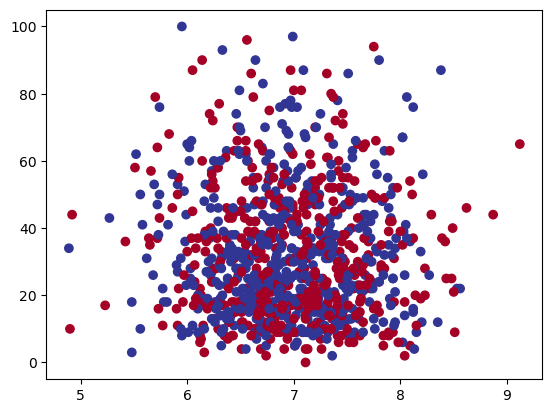

In [78]:
import matplotlib.pyplot as plt
plt.scatter(placed_df['cgpa'],placed_df['placement_exam_marks'],c=placed_df['placed'],cmap='RdYlBu_r')

In [50]:

x = placed_df.iloc[:,0:2]
y = placed_df.iloc[:,-1]

In [51]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [52]:
from sklearn.linear_model import LogisticRegression 

In [53]:
clf = LogisticRegression()

In [54]:
clf.fit(x_train,y_train)

LogisticRegression()

In [55]:
y_pred =clf.predict(x_test)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(y_test,y_pred)

0.5

In [61]:
placed_df.corr()

,cgpa,placement_exam_marks,placed
cgpa,1.000000,-0.027371,0.027212
placement_exam_marks,-0.027371,1.000000,-0.025530
placed,0.027212,-0.025530,1.000000


<Axes: >

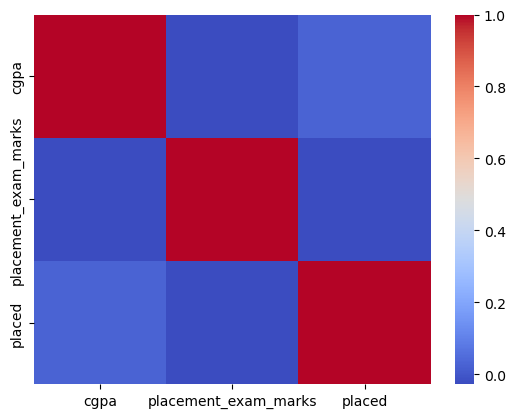

In [72]:
sns.heatmap(placed_df.corr(),cmap='coolwarm')